<a href="https://colab.research.google.com/github/mohansam/opensourcepos/blob/master/Copy_of_digitRecognizer_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
traindir_path='/content/drive/My Drive/Colab Notebooks/mnistdata/train.csv'
testdir_path='/content/drive/My Drive/Colab Notebooks/mnistdata/test.csv'

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt


In [0]:
train=pd.read_csv(traindir_path)
test=pd.read_csv(testdir_path)

In [0]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
ytrain=train.pop('label')
xtrain=train.values
xtest=test.values

In [0]:
(kxtrain,kytrain),(kxtest,kytest)=keras.datasets.mnist.load_data()

In [0]:
xtrain=xtrain/255.0
xtest=xtest/255.0
kxtrain=kxtrain/255.0
kxtest=kxtest/255.0

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

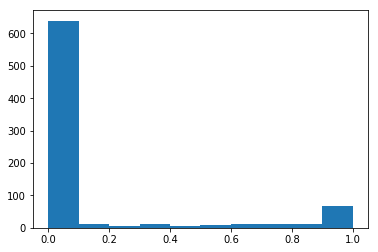

In [0]:
image=cn_kxtrain[0,:].reshape([28,28])
plt.hist(image.reshape(784))

1

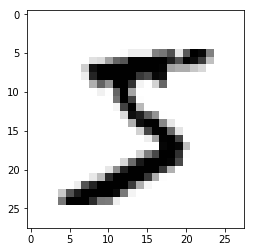

In [0]:
plt.imshow(image,cmap=plt.cm.binary)
ytrain[0]

In [0]:
submission_dir='/content/drive/My Drive/Colab Notebooks/mnistdata/sample_submission.csv'

In [0]:
sub=pd.read_csv(submission_dir)

In [0]:
sub['Label']=label
sub.to_csv(submission_dir)

# model accuracy improvment

In [0]:
cn_xtrain=xtrain.reshape([-1,28,28,1])
cn_xtest=xtest.reshape([-1,28,28,1])
cn_kxtrain=kxtrain.reshape([-1,28,28,1])
cn_kxtest=kxtest.reshape([-1,28,28,1])

In [0]:
cn_x=np.concatenate((kxtrain,kxtest))
cn_y=np.concatenate((kytrain,kytest))
cn_x=cn_x.reshape([-1,28,28,1])
cn_y.shape

(70000,)

In [0]:
datagen =keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(cn_x)

In [0]:
model=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(28,28,1),activation='relu',padding='same'),
                      keras.layers.Conv2D(32,5,activation='relu',padding='same'),
                      keras.layers.MaxPool2D(),
                      keras.layers.Conv2D(16,5,activation='relu',padding='same'),
                      keras.layers.Flatten(),
                      keras.layers.Dense(128,activation='relu'),
                      keras.layers.Dense(10,activation='softmax')])

In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 16)        12816     
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [0]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [0]:
epochs=100
batch_size=32
filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5'
stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
save=keras.callbacks.ModelCheckpoint(filepath=filepath)

In [0]:
model.load_weights('/content/weights.27-0.01.hdf5')

In [0]:
history=model.fit_generator(datagen.flow(cn_x,cn_y),
                  epochs=epochs,
                  callbacks=[stop,save],
                 validation_data=(cn_xtrain,ytrain))

Epoch 1/100
2188/2188 [==============================] - 41s 19ms/step - loss: 0.0182 - acc: 0.9945 - val_loss: 0.0072 - val_acc: 0.9977
Epoch 2/100
2188/2188 [==============================] - 40s 18ms/step - loss: 0.0168 - acc: 0.9947 - val_loss: 0.0092 - val_acc: 0.9970
Epoch 3/100
2188/2188 [==============================] - 40s 18ms/step - loss: 0.0170 - acc: 0.9948 - val_loss: 0.0090 - val_acc: 0.9971
Epoch 4/100
2188/2188 [==============================] - 40s 18ms/step - loss: 0.0172 - acc: 0.9946 - val_loss: 0.0074 - val_acc: 0.9973
Epoch 5/100
2188/2188 [==============================] - 39s 18ms/step - loss: 0.0153 - acc: 0.9948 - val_loss: 0.0092 - val_acc: 0.9972
Epoch 6/100
2188/2188 [==============================] - 39s 18ms/step - loss: 0.0155 - acc: 0.9950 - val_loss: 0.0110 - val_acc: 0.9969
Epoch 7/100
2188/2188 [==============================] - 40s 18ms/step - loss: 0.0157 - acc: 0.9953 - val_loss: 0.0087 - val_acc: 0.9974
Epoch 8/100
2188/2188 [==================

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/mnistdata/99accurcymnist_cnn.h5')

In [0]:
his=history.history
loss=his['loss']
acc=his['acc']
val_loss=his['val_loss']
val_acc=his['val_acc']

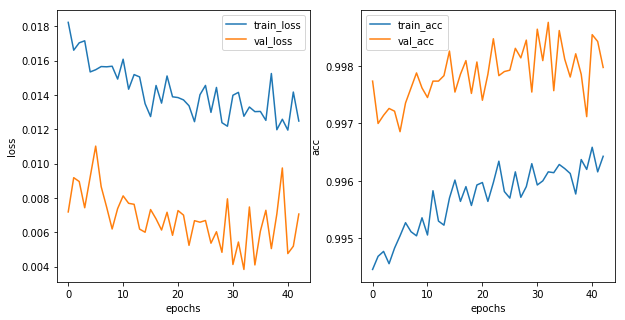

In [0]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc,label='train_acc')
plt.plot(val_acc,label='val_acc')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()


In [0]:
model.evaluate(cn_kxtest,kytest)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.0045 - acc: 0.9985


[0.004532560647225841, 0.9985]

In [0]:
pred=model.predict(cn_xtest)

2


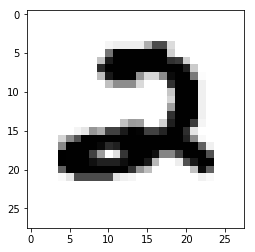

0


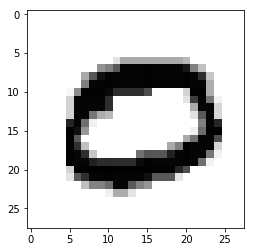

9


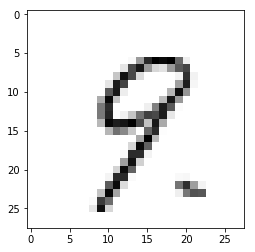

0


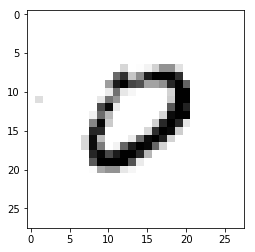

3


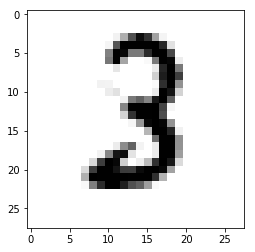

7


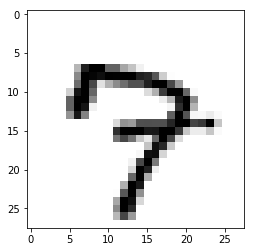

0


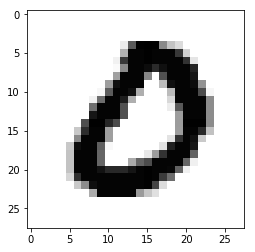

3


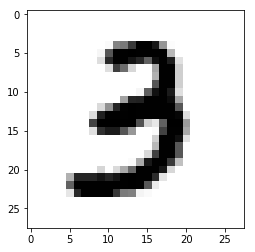

0


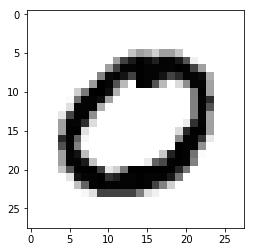

3


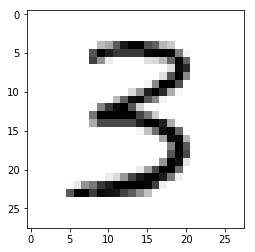

In [0]:
for i in range(10):
  image=xtest[i,:].reshape([28,28])
  plt.imshow(image,cmap=plt.cm.binary)
  print(np.argmax(pred[i]))
  plt.show()

In [0]:
sub=pd.read_csv('/content/sample_submission.csv')

In [0]:
label=[]
for i in range(len(pred)):
  label.append(np.argmax(pred[i]))

In [0]:
sub['Label']=label

In [0]:
sub.to_csv('/content/sample_submission.csv')

In [0]:
sub.head()

,Unnamed: 0,ImageId,Label
0,0,1,2
1,1,2,0
2,2,3,9
3,3,4,0
4,4,5,3
